In [240]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

In [252]:
def oscillation(nu, tau, phi):
    return np.cos(4*np.pi*tau*nu + phi)

def amplitude_hg07(nu, nu0, delta, gamma):
    return gamma * nu0 * np.exp(- 8 * np.pi**2 * delta**2 * nu**2)

def amplitude_ly23(nu, nu0, delta, gamma):
    return 2*np.sqrt(2*np.pi) * gamma * delta * nu0 * nu * np.exp(- 8 * np.pi**2 * delta**2 * nu**2)
#     return 0.5 * gamma * nu0 * erfi(2 * np.sqrt(2) * np.pi * nu * delta) * np.exp(- 8 * np.pi**2 * delta**2 * nu**2)
#     err = erf((2 - 4j * np.pi * nu * delta) / np.sqrt(2)) + erfi((2 + 4j * np.pi * nu * delta) / np.sqrt(2))
#     return gamma * nu0 * np.exp(- 8 * np.pi**2 * delta**2 * nu**2) * err.real

def integrated(nu, nu0, delta, gamma, tau, phi, n=501, bounds=None):
    if bounds is None:
        bounds = (tau - 5*delta, tau + 5*delta)
    t = np.linspace(*bounds, n)
    dtau = np.exp(- (t - tau)**2/2/delta**2) * np.cos(4*np.pi*t*nu[:, None] + phi)
    return gamma * nu0 / np.sqrt(2*np.pi) / delta * trapezoid(dtau, t)

In [253]:
num_points = 201
nu_min, nu_max = nu_range = (.001, .004)
nu = np.linspace(nu_min, nu_max, num_points)

tau = 800. # s
phi = 0.

nu0 = 1.4e-4  # Hz
delta = 0.1*tau  # s
gamma = 0.05 * np.sqrt(2*np.pi) * delta  # s

osc = oscillation(nu, tau, phi)
hg07 = amplitude_hg07(nu, nu0, delta, gamma) * osc
ly23 = amplitude_ly23(nu, nu0, delta, gamma) * osc
integ = integrated(nu, nu0, delta, gamma, tau, phi)

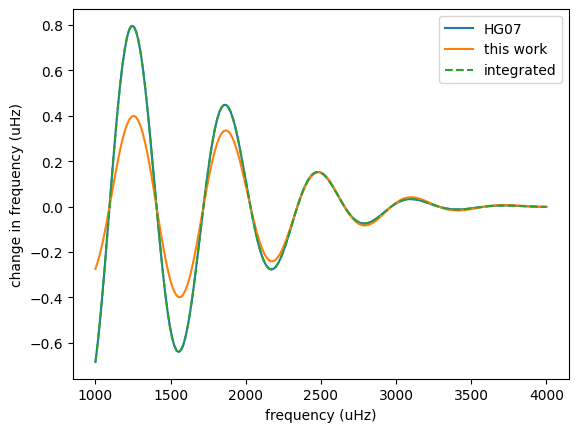

In [255]:
fig, ax = plt.subplots()
fac = 1e6

ax.plot(fac*nu, fac*nu*hg07, label="HG07")
ax.plot(fac*nu, fac*nu*ly23, label="this work")
ax.plot(fac*nu, fac*nu*integ, "--", label="integrated")

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("change in frequency (uHz)")
ax.legend();

In [226]:
1/(4*np.pi*nu*delta)

array([0.99471839, 0.98001812, 0.96574601, 0.95188363, 0.93841358,
       0.92531944, 0.91258568, 0.90019764, 0.88814142, 0.87640387,
       0.86497252, 0.85383553, 0.84298169, 0.83240033, 0.82208132,
       0.81201502, 0.80219225, 0.7926043 , 0.78324283, 0.77409992,
       0.765168  , 0.75643984, 0.74790857, 0.73956758, 0.73141058,
       0.72343156, 0.71562474, 0.70798462, 0.70050591, 0.69318355,
       0.68601269, 0.67898867, 0.67210702, 0.66536347, 0.6587539 ,
       0.65227436, 0.64592104, 0.63969029, 0.6335786 , 0.62758258,
       0.621699  , 0.6159247 , 0.61025668, 0.60469203, 0.59922795,
       0.59386173, 0.58859077, 0.58341255, 0.57832465, 0.57332472,
       0.56841051, 0.56357983, 0.55883056, 0.55416067, 0.54956817,
       0.54505117, 0.54060782, 0.53623633, 0.53193497, 0.52770207,
       0.523536  , 0.51943519, 0.51539813, 0.51142334, 0.50750938,
       0.50365488, 0.49985849, 0.4961189 , 0.49243485, 0.48880511,
       0.48522849, 0.48170382, 0.47823   , 0.47480592, 0.47143

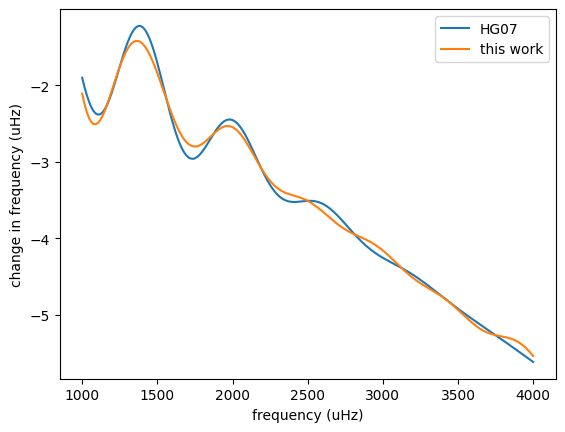

In [206]:
fig, ax = plt.subplots()
fac = 1e6

smo = gamma * nu0  # smooth component of dnu/nu
ax.plot(fac*nu, fac*nu*(hg07 - smo), label="HG07")
ax.plot(fac*nu, fac*nu*(ly23 - smo), label="this work")

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("change in frequency (uHz)")
ax.legend();

In [195]:
from scipy.special import erfi, erf

In [238]:
err = erf((20 - 4j * np.pi * nu * delta) / np.sqrt(2)) + erfi((20 + 4j * np.pi * nu * delta) / np.sqrt(2))

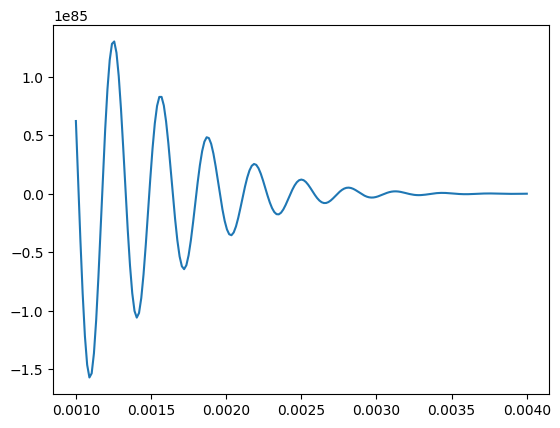

In [239]:
# plt.plot(nu, erfi(4 * np.pi * nu * delta / np.sqrt(2)))
plt.plot(nu, err.real)
# plt.plot(nu, err.imag)

In [173]:
1/(2*np.pi*nu*(tau+delta))

array([0.18085789, 0.17818511, 0.17559018, 0.17306975, 0.17062065,
       0.1682399 , 0.16592467, 0.1636723 , 0.16148026, 0.15934616,
       0.15726773, 0.15524282, 0.1532694 , 0.15134551, 0.14946933,
       0.14763909, 0.14585314, 0.14410987, 0.14240779, 0.14074544,
       0.13912145, 0.13753452, 0.13598338, 0.13446683, 0.13298374,
       0.13153301, 0.13011359, 0.12872448, 0.12736471, 0.12603337,
       0.12472958, 0.12345248, 0.12220128, 0.12097518, 0.11977344,
       0.11859534, 0.11744019, 0.11630732, 0.11519611, 0.11410592,
       0.11303618, 0.11198631, 0.11095576, 0.10994401, 0.10895054,
       0.10797486, 0.1070165 , 0.10607501, 0.10514994, 0.10424086,
       0.10334737, 0.10246906, 0.10160556, 0.10075648, 0.09992149,
       0.09910021, 0.09829233, 0.09749751, 0.09671545, 0.09594583,
       0.09518836, 0.09444276, 0.09370875, 0.09298606, 0.09227443,
       0.09157362, 0.09088336, 0.09020344, 0.08953361, 0.08887366,
       0.08822336, 0.08758251, 0.08695091, 0.08632835, 0.08571

In [111]:
plt.plot(nu, erfi(4*np.pi/np.sqrt(2) * nu * delta))

80.0

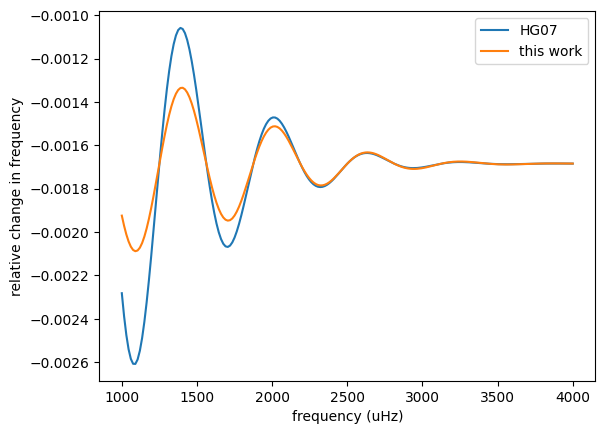

In [96]:
fig, ax = plt.subplots()
fac = 1e6

smo = gamma * nu0  # smooth component of dnu/nu
ax.plot(fac*nu, (hg07 - smo), label="HG07")
ax.plot(fac*nu, (ly23 - smo), label="this work")

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("relative change in frequency")
ax.legend();

Text(0, 0.5, 'difference (%)')

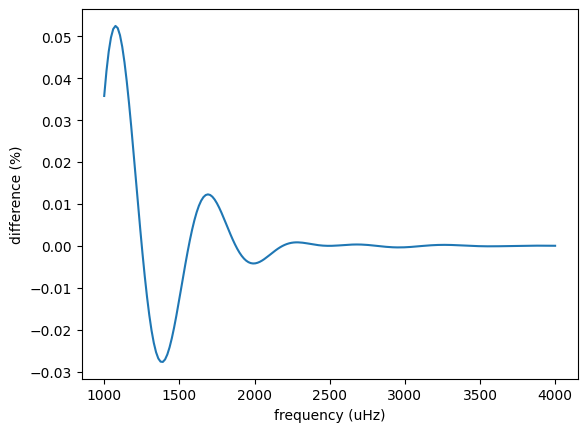

In [93]:
fig, ax = plt.subplots()
fac = 1e6

ax.plot(fac*nu, 100*(ly23 - hg07))

ax.set_xlabel("frequency (uHz)")
ax.set_ylabel("difference (%)")
# ax.legend();